In [1]:
# no scaling taking 15 to 22 train rest test predicting only high 5 lag

#res = []
#for i in range((1)):
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.initializers import GlorotUniform
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.models import load_model
from keras.layers import Bidirectional, GRU, Dense
import yfinance as yf
import datetime
import pandas as pd
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Load the data
df  = pd.DataFrame(yf.download("ETERNAL.NS", interval="1d",period='max'))
dft = df
data = df
data = data.dropna()

# Extract features and target columns
features = ['Open', 'High', 'Low', 'Close']
data = data[features].values
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(data)
print(df)

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker      ETERNAL.NS  ETERNAL.NS  ETERNAL.NS  ETERNAL.NS ETERNAL.NS
Date                                                                 
2021-07-23  126.000000  138.899994  115.000000  116.000000  694895200
2021-07-26  140.649994  143.750000  125.300003  126.349998  249723800
2021-07-27  132.899994  147.800003  127.750000  141.699997  240341900
2021-07-28  131.199997  135.000000  123.550003  131.000000  159793700
2021-07-29  141.550003  144.000000  132.199997  134.949997  117973000
...                ...         ...         ...         ...        ...
2025-12-08  285.250000  297.399994  284.149994  290.899994   85127960
2025-12-09  291.700012  292.299988  280.299988  284.549988   27053860
2025-12-10  283.250000  293.000000  282.000000  289.000000   20644410
2025-12-11  290.950012  291.899994  283.049988  284.000000   21043740
2025-12-12  298.049988  299.000000  288.600006  290.100006   27287511

[1066 rows x 5 colu

In [5]:
# Create sequences of length 30
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 1
X, y = create_sequences(data, SEQ_LENGTH)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.04, shuffle=False)#best 0.2 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(1022, 1, 4) (43, 1, 4) (1022, 4) (43, 4)


In [7]:
model = Sequential()

model.add(Bidirectional(LSTM(512, activation='relu', return_sequences=True, input_shape=(SEQ_LENGTH, len(features)))))
#model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(256, activation='relu')))
#model.add(Dropout(0.1))
model.add(Dense(len(features)))
model.compile(optimizer=Adam(learning_rate=0.001) , loss='mse')#,metrics = ['mean_absolute_error'])
#model.summary()

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=30, verbose=1)
early_stopping = EarlyStopping(restore_best_weights=True,patience=300 )#,monitor='val_loss',verbose=1, mode='auto', )

history = model.fit(X_train, y_train, epochs=300, batch_size=256, validation_data=(X_test, y_test), verbose = True ,
                    callbacks=[early_stopping],)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - loss: 29307.6953 - val_loss: 75439.5000
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 19748.1055 - val_loss: 29493.2031
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 6026.8564 - val_loss: 2623.5605
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1540.4019 - val_loss: 6739.9722
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1461.9954 - val_loss: 848.2154
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 260.1765 - val_loss: 1545.8132
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 530.2993 - val_loss: 990.3245
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 253.6138 - val_loss: 178.9635
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 94.5763 - val_loss: 669.4433
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 172.1284 - val_loss: 267.2501
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 56.5949 - val_loss: 126.0947
Epoch 12/300
4/4 

In [8]:
loss = model.evaluate(X_test, y_test)
t_loss = model.evaluate(X_train,y_train)
print(f'Test Loss: {loss}')
print(f'Train Loss: {t_loss}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 14.5883
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.5283 
Test Loss: 14.133240699768066
Train Loss: 13.54390811920166


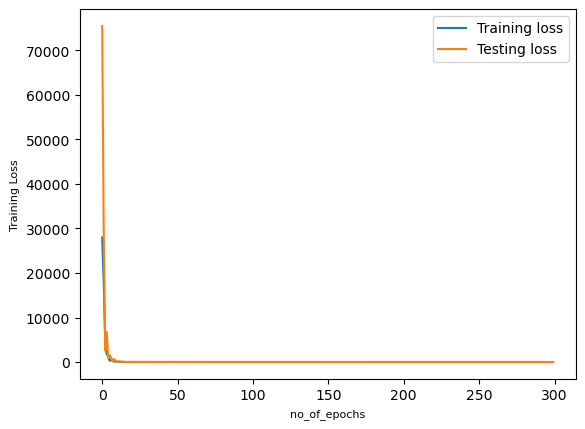

In [9]:
plt.plot(history.history['loss'],label='Training loss' )
plt.plot(history.history['val_loss'], label='Testing loss')
plt.xlabel('no_of_epochs', fontsize=8 )
plt.ylabel('Training Loss', fontsize=8 )
plt.legend()

In [10]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions to original scale
#predictions = scaler.inverse_transform(predictions)

# Evaluate model performance
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Predict for the next day
last_sequence = data[-SEQ_LENGTH:]  # Take the last SEQ_LENGTH days
next_day_pred = model.predict(np.expand_dims(last_sequence, axis=0))

# Inverse transform the prediction
#next_day_pred = scaler.inverse_transform(next_day_pred)
print(f'Next Day Prediction: {next_day_pred}')

#res.append(next_day_pred[0])


y_pred = predictions 
#y_test_ =  scaler.inverse_transform(y_test)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R^2)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R^2): {r2}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 441ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 14.5883
Test Loss: 14.133240699768066
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Next Day Prediction: [[297.52304 302.4274  292.55154 296.98898]]
Mean Squared Error (MSE): 14.13324052926023
Root Mean Squared Error (RMSE): 3.759420238449039
Mean Absolute Error (MAE): 2.867661941883176
R-squared (R^2): 0.9601685512052667
